In [16]:
import json
import base64
from PIL import Image
from rag_search.vector_db import VectorDatabase

In [4]:
#### LOAD OPENAI API KEY
with open("../keys/mvp_projects_key.txt","r") as f:
    api_key = f.read()

In [5]:
#### INITIATE VECTOR CLASS
vec = VectorDatabase(
    text_embedding_model = "openai-text-embedding-3-small",
    image_embedding_model = "local-clip-vit-base-patch32",
    captioning_model = "openai-gpt-4v",
    openai_api_key = api_key,
    save_dir = None # assign to default save directory
    )

In [10]:
#### VECTORIZE ALL FILES IN FOLDER
vec.vectorize_folder(folder_path = './rag_search/data')

PDF detected
Processing Doc: rag_search\data\contrary_research_hebbia.pdf


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Captioning Image: pg 0; img 4
Captioning Image: pg 0; img 9
Captioning Image: pg 0; img 10
Captioning Image: pg 0; img 11
Captioning Image: pg 0; img 12
Captioning Image: pg 1; img 25
Captioning Image: pg 1; img 26
Captioning Image: pg 1; img 27
Captioning Image: pg 2; img 35
Captioning Image: pg 2; img 25
Captioning Image: pg 2; img 36
Captioning Image: pg 2; img 37
Captioning Image: pg 3; img 25
Captioning Image: pg 3; img 51
Captioning Image: pg 3; img 52
Captioning Image: pg 4; img 25
Captioning Image: pg 4; img 26
Captioning Image: pg 4; img 62
Captioning Image: pg 5; img 67
Captioning Image: pg 5; img 25


c:\Users\fergu\OneDrive\Documents\PersonalProjects\agentic_orchestration\.venv\lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\fergu\.cache\huggingface\hub\models--openai--clip-vit-base-patch32. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Captioning Image: pg 5; img 26
Captioning Image: pg 5; img 62
Captioning Image: pg 6; img 76
Captioning Image: pg 6; img 25
Captioning Image: pg 6; img 26
Captioning Image: pg 6; img 62
Captioning Image: pg 7; img 84
Captioning Image: pg 7; img 25
Captioning Image: pg 7; img 87
Captioning Image: pg 7; img 88
Captioning Image: pg 8; img 25
Captioning Image: pg 8; img 104
Captioning Image: pg 8; img 105
Captioning Image: pg 9; img 25
Captioning Image: pg 9; img 118
Captioning Image: pg 9; img 119
Captioning Image: pg 10; img 25
Captioning Image: pg 10; img 134
Captioning Image: pg 10; img 135
Captioning Image: pg 11; img 25
Captioning Image: pg 11; img 150
Captioning Image: pg 11; img 151
Captioning Image: pg 12; img 25
Captioning Image: pg 12; img 163
Captioning Image: pg 12; img 164
Captioning Image: pg 13; img 25
Captioning Image: pg 13; img 178
Captioning Image: pg 13; img 179
Captioning Image: pg 14; img 25
Captioning Image: pg 14; img 192
Captioning Image: pg 14; img 193
Captioning

In [6]:
#### SEARCH FOR RESPONSE
query = {
    "text": "How has Hebbia's revenue grown in recent years?"
    }
search_file = "rag_search/data/hebbia_sacra_report.pdf"
response = vec.run_search(search_content = query, search_location = search_file)

print(json.dumps(response, indent=2))

Searching only in specified file: rag_search/data/hebbia_sacra_report.pdf
Commencing search of databse
Top Similarity Scores: [0.70396456 0.65231228 0.65013355 0.59341435 0.58580476]


c:\Users\fergu\OneDrive\Documents\PersonalProjects\agentic_orchestration\rag_search\vector_db.py:536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_references['search_reference'] = text
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Top Similarity Scores: [0.4008376  0.2388543  0.22179551 0.21208616]


c:\Users\fergu\OneDrive\Documents\PersonalProjects\agentic_orchestration\rag_search\vector_db.py:548: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_references['search_reference'] = text


{
  "response": "Hebbia has experienced significant revenue growth, with its annualized recurring revenue (ARR) skyrocketing from $0.47 million in 2022 to $10 million in 2023, marking a 2046% increase. This growth has been driven by new customer acquisitions and expanded usage within existing accounts, although some revenue may come from pilot contracts with institutions early in AI tool adoption. In July 2024, Hebbia was valued at $700 million during its Series B funding round, led by Andreessen Horowitz, and has raised a total of $161.1 million across four funding rounds. The company, known for its AI-powered document analysis software, has achieved substantial market penetration, especially in private equity due diligence, claiming 90% market share among top PE firms. Key investors include Andreessen Horowitz, Index Ventures, Google Ventures, and Peter Thiel.",
  "sources": [
    {
      "doc_name": "rag_search\\data\\hebbia_sacra_report.pdf",
      "page_num": 1,
      "content_typ

In [7]:
#### SEARCH FOR RESPONSE
query = {
    "text": "What is their business model?"
    }
search_file = "rag_search/data/hebbia_sacra_report.pdf"
response = vec.run_search(search_content = query, search_location = search_file)

print(json.dumps(response, indent=2))

Searching only in specified file: rag_search/data/hebbia_sacra_report.pdf
Commencing search of databse
Top Similarity Scores: [0.5707856  0.40836532 0.3856644  0.35623279 0.35484819]


c:\Users\fergu\OneDrive\Documents\PersonalProjects\agentic_orchestration\rag_search\vector_db.py:536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_references['search_reference'] = text


Top Similarity Scores: [0.2509783  0.22881222 0.21785596 0.21750349]


c:\Users\fergu\OneDrive\Documents\PersonalProjects\agentic_orchestration\rag_search\vector_db.py:548: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_references['search_reference'] = text


{
  "response": "Hebbia operates in the enterprise software sector, primarily generating revenue through software subscriptions similar in pricing to Bloomberg Terminal subscriptions. The company excels in enterprise search, particularly in financial services, where it serves 33% of the top global asset managers by assets under management. Their business model leverages a go-to-market strategy focused on securing high-value enterprise accounts. Hebbia's notable growth is supported by its data advantage, using search queries and interactions to enhance model understanding of organizational context and user intent. This data-driven approach underpins their substantial market expansion potential.",
  "sources": [
    {
      "doc_name": "rag_search\\data\\hebbia_sacra_report.pdf",
      "page_num": 2,
      "content_type": "text_chunk",
      "content_id": "2",
      "content_raw": "Business Model"
    },
    {
      "doc_name": "rag_search\\data\\hebbia_sacra_report.pdf",
      "page_num

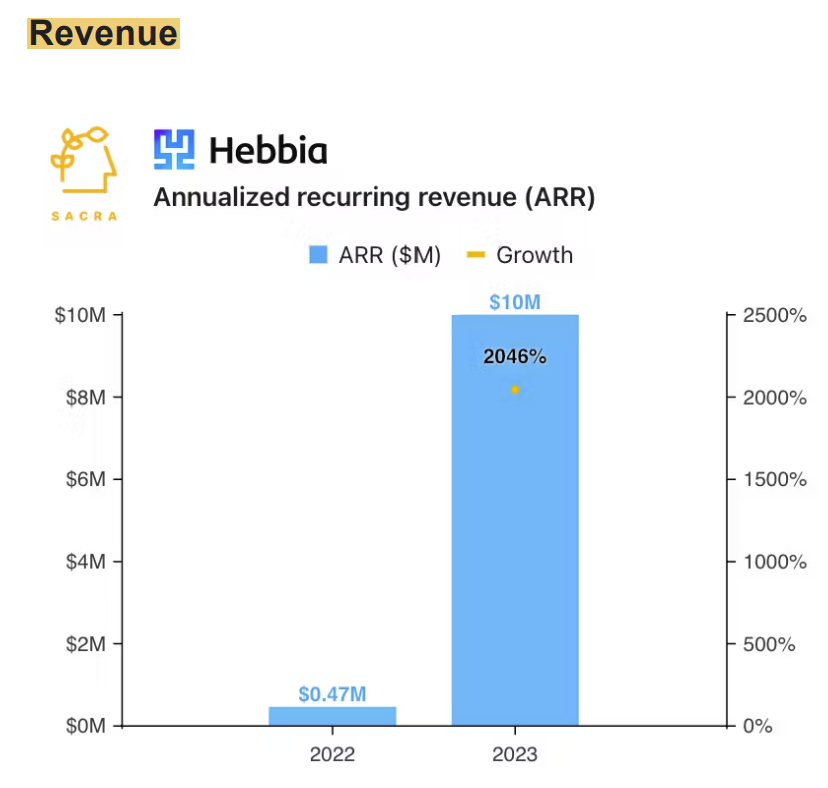

In [20]:
img = Image.open("./example_graph_1.png")
img

In [ ]:
#### SEARCH FOR IMAGE
with open("./example_graph_1.png", "rb") as image_file:
    base64_image = base64.b64encode(image_file.read()).decode("utf-8")
    
query = {
    "image": [base64_image]
    }
search_file = "rag_search/data/hebbia_sacra_report.pdf"
response = vec.run_search(search_content = query, search_location = search_file)

print(json.dumps(response, indent=2))

Searching only in specified file: rag_search/data/hebbia_sacra_report.pdf
Commencing search of databse
Top Similarity Scores: [0.872886   0.52555263 0.45391196 0.35101125]


c:\Users\fergu\OneDrive\Documents\PersonalProjects\agentic_orchestration\rag_search\vector_db.py:566: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_image_references['search_reference'] = img


Error calling GPT endpoint: Error code: 429 - {'error': {'message': 'Request too large for gpt-4o in organization org-Fz3ZolgCTrIf2sx2SxyxT0ck on tokens per min (TPM): Limit 30000, Requested 39168. The input or output tokens must be reduced in order to run successfully. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}
{
  "response": null,
  "sources": [
    {
      "doc_name": "rag_search\\data\\hebbia_sacra_report.pdf",
      "page_num": 1,
      "content_type": "image",
      "content_id": "38",
      "content_raw": "iVBORw0KGgoAAAANSUhEUgAAA0gAAALsCAIAAABWfwDAAAAACXBIWXMAAA7EAAAOxAGVKw4bAAFd0ElEQVR4nOydBXwW5R/AJ12KxAaMJTlqjDEaBFFaCVEBRQzE4G8g0ojkQFpRuksRJNbvmu6OdbAey7fj6vf/3T3b8fJujNqGjuf7+fl678Vzz9173H331FkBhUKhUCgUCqVCYPW8M0ChUCgUCoVCKR2o2FEoFAqFQqFUEKjYUSgUCoVCoVQQqNhRKBQKhUKhVBCo2FEoFAqFQqFUEKjYUSgUCoVCoVQQqNhRKBQKhUKhVBCo2FEoFAqFQqFUEKjYUSgUCoVCoVQQqNhRKBQKhUKhVBCo2FEoFAqFQqFUEKjYUSgUCoVCoVQ